In [1]:
import numpy as np
import pandas as pd
import os.path
import time
import math
import random
import matplotlib.pyplot as plt


In [2]:
class SVM_Softplus:
    def __init__(self, X, y, k, init_lambda=0.01, a=5):
        self.k = k
        self.N, self.d = X.shape
        self.eta = 0.8
        self.beta_inv=float(a)
        self.beta = float(1./a)
        self.plambda = init_lambda
        self.w=np.zeros((self.d,1))
        self.w.fill(0.001)
        self.convergence_path=[]
        self.build(X,y)
    
    def costs(self):
        return self.convergence_path
    
    def softplus(self, L): #objective function
        l=L[0]
        bL = self.beta * l
        y = (np.fmax(bL, 0) + np.log1p(np.exp(-np.fabs(bL)))) * self.beta_inv
        return np.array(y)
        
    def find_weights(self, X, y): 
        self.w += np.random.uniform(-1,1,self.w.shape)
        k_tot = 20*self.N
        
        #sgd algorithm
        for t in range(1, k_tot):
            batch = random.sample(range(self.N), self.k)
            # work on batch-size of k
            Xt, yt =X[batch], y[batch]
            
            grad = np.zeros((self.d,1))
            for i in range(k):
                nr =  -1 * yt[i]*(Xt[i].T)
                tag = yt[i]* np.dot(np.transpose(self.w),Xt[i])
                dr = 1 + np.exp(-1* self.beta * ( 1 - tag) )
                nr =  nr.reshape(-1,1)
                grad+=(np.divide(nr,np.asscalar(dr)))
            grad += (2*self.plambda*self.w)
            wn = self.w - (self.eta * grad)
            
            l = 1 - yt * np.dot(Xt, wn)
            cost = np.mean(self.softplus(l)) + (self.plambda*(np.linalg.norm(wn)**2))
            #self.convergence_path.append(cost.flatten().item())
            self.convergence_path.append(cost)
            
            if(np.linalg.norm(grad)<0.001 and t>50):
                    break
            else:
                self.w = wn

    def build(self, X, y):
        self.find_weights(X,y)

In [4]:
def mySoftplus(filename, k, numruns):
    assert os.path.isfile(filename) and os.access(filename, os.R_OK)
    df=pd.read_csv(filename, sep=',', header = None)
    
    data = df.as_matrix()
    y=data[:, 0]
    X=data[:, 1:]
    
    del df,data
    
    def reclassify(labels, a, b):
        f=np.vectorize(lambda x: 0 if x==a else 1.0)
        return f(labels)
    
    original_classes = np.unique(y)
    assert len(original_classes)==2
    y=reclassify(y, original_classes[0], original_classes[1])
    y=np.reshape(y, [X.shape[0], 1])
    
    numruns = int(numruns) # no of times SVM needs to be trained
    k = int(k) # batch size
    timetaken = [0]*numruns
    
    costs = []
    for t in range(numruns):
        print("Run :: %d training stochastic-gradient descent.."%(t+1))
        start = time.time()
        svm = SVM_Softplus(X, y, k) # give the entire dataset for training
        costs = svm.costs()
        plt.plot(costs, '-')
        stop = time.time()
        timetaken[t] = stop - start
    else:
        plt.ylabel('cost function')
        plt.legend([k], loc='upper right')
        plt.show()
        
    tavg = np.mean(timetaken)
    tstd = np.std(timetaken, ddof=1)
    print("Mean run-time:"+str(tavg))
    print("Std run-time:"+str(tstd))
    print("------------------------------------")

SGD softplus optimization for batch-size 1
Run :: 1 training stochastic-gradient descent..
Run :: 2 training stochastic-gradient descent..


/home/ajay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


Run :: 3 training stochastic-gradient descent..
Run :: 4 training stochastic-gradient descent..
Run :: 5 training stochastic-gradient descent..


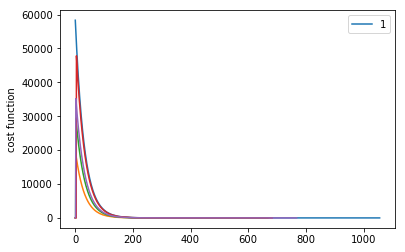

Mean run-time:0.119775247574
Std run-time:0.0445145263964
------------------------------------
SGD softplus optimization for batch-size 20
Run :: 1 training stochastic-gradient descent..
Run :: 2 training stochastic-gradient descent..
Run :: 3 training stochastic-gradient descent..
Run :: 4 training stochastic-gradient descent..
Run :: 5 training stochastic-gradient descent..


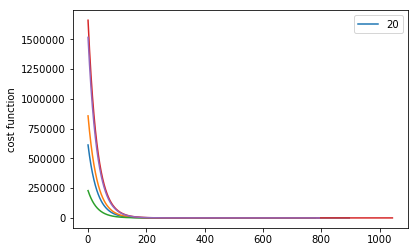

Mean run-time:0.836287784576
Std run-time:0.117665683779
------------------------------------
SGD softplus optimization for batch-size 200
Run :: 1 training stochastic-gradient descent..
Run :: 2 training stochastic-gradient descent..
Run :: 3 training stochastic-gradient descent..
Run :: 4 training stochastic-gradient descent..
Run :: 5 training stochastic-gradient descent..


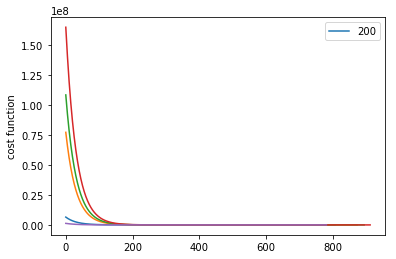

Mean run-time:7.51200127602
Std run-time:0.338920426142
------------------------------------
SGD softplus optimization for batch-size 1000
Run :: 1 training stochastic-gradient descent..
Run :: 2 training stochastic-gradient descent..
Run :: 3 training stochastic-gradient descent..
Run :: 4 training stochastic-gradient descent..
Run :: 5 training stochastic-gradient descent..


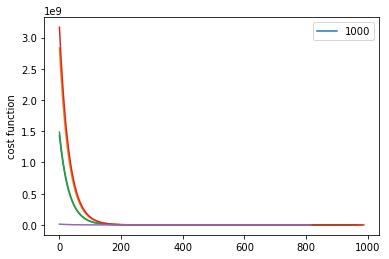

Mean run-time:72.7516998291
Std run-time:19.1000477673
------------------------------------
SGD softplus optimization for batch-size 2000
Run :: 1 training stochastic-gradient descent..
Run :: 2 training stochastic-gradient descent..
Run :: 3 training stochastic-gradient descent..
Run :: 4 training stochastic-gradient descent..
Run :: 5 training stochastic-gradient descent..


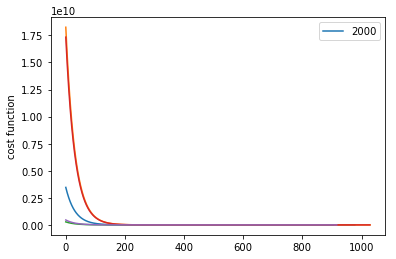

Mean run-time:113.928004169
Std run-time:31.3864614721
------------------------------------


In [5]:
for k in [1, 20, 200, 1000, 2000]:
#for k in [20]:
    print("SGD softplus optimization for batch-size %d"%k)
    mySoftplus('./MNIST-13.csv', k, 5)